<a href="https://colab.research.google.com/github/EmoreiraV/DPIP/blob/main/Texas_Hold_'em_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Texas Hold'em

Please find below a fun exercise which should allow you to play with Python classes and Python data structures in a more relaxed manner. There is no marks for this, this has just to let you get more familar with writting python, and thus the task is open ended, if you want to spend a lot of time on this and/or make something very complicated then great, or if you want to practice python a little then also great :-).

The task is to write a (**simple**) betting strategy for a game of Texas Hold'em and then evaluate how well it does in comparison to some simple strategies I have defined.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Holdem.jpg/640px-Holdem.jpg)

Source: Author: Todd Klassy Url: https://commons.wikimedia.org/wiki/File:Holdem.jpg

## Set up

Lets first get the code that is going to do all of the work. For those that want to learn more about object orientated programming please have a look through the code :-).

Further, if you spot an error and/or want to add something else to the code, we always welcome a pull request :-).


In [1]:
!git clone -b texasHoldem https://github.com/UofGAnalyticsData/DPIP.git
!git -C DPIP pull

Cloning into 'DPIP'...
remote: Enumerating objects: 309, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 309 (delta 12), reused 11 (delta 4), pack-reused 271
Receiving objects: 100% (309/309), 735.77 KiB | 5.79 MiB/s, done.
Resolving deltas: 100% (143/143), done.
Already up to date.


Lets import all of the classes we need to use:



In [3]:
from DPIP.texasHoldem import cards
from DPIP.texasHoldem import game
from DPIP.texasHoldem import hand
from DPIP.texasHoldem import player

## Texas Hold'em Introduction

Texas Hold'em is a popular version of poker, where every player is dealt 2 cards, which they have to combine with a set of community cards to make the best hand. The overall betting strategy is complicated, but in simple terms works as follows:

1.   All players are dealt 2 cards and can then bet (wager money) that they will have the best hand, if a player does not wish to bet then they are out.
2.   3 community cards are drawn, and then another betting round occurs.
2.   1 community card is drawn, and then another betting round occurs.
2.   1 community card is drawn, and then a final betting round occurs.

The player with the best hand at the end (or if all other players are out), the only player remaining wins all of the money that has been wagered.

For a full explanation of texas hold'em see the following document for a quick overview:

https://www.partypoker.com/en/how-to-play/texas-holdem


### Poker hand ranking:

Of course to understand this game, we need to know which poker hands are better, rather than recite the list full details about which poker hand are better can be found on the following page:

https://en.wikipedia.org/wiki/List_of_poker_hands

### Simplifications:

Texas Hold'em is quite complex, and thus for the version we are using a small number of simplifications:

1.   Every player is in for every hand with 1 unit of currency (i.e. one dollar) (i.e. no big and small blinds).
2.   Limited number of betting rounds with each card, with a final round where you can only bet enough to stay in.
3. No complex hand rules all suits are considered equal.
4. No wild cards!



## Our implementation

If you are interested in the full implementation (**written quickly -- no judgements**!), then feel please check out the github above, it is not the most efficient implementation, but it is fast enough for our purposes.

In general, it has been designed to use a lot of the object orientated programming we have been discussing, and for those who are interested I would encourage you to look through it.

However, to complete the task, you need to define strategies and thus you need to understand our class implementaton.  First, the cards look like this:

```python
class Card:
    """
    This is a simple class which represents a single card
    """
    def __init__(self,suit,number):
        # Error checking which we leave out for brevity
        self.suit = suit # This is a string
        self.number = number # This is a string
        # Extra logic removed for brevity
    def getSuit(self):
        return self.suit
    def getNumber(self):
        return self.number
    def __str__(self):
        return f"{self.number} of {self.suit}"
    def display(self):
        pass
```

As we need to store both numbers 2, 3, 4 and face cards in our number section we will store this as a **strings**, and we have added extra methods to get the number and suit of the card.

Therefore to test if a particular card is a heart, you need to do the following:

In [4]:
new_card = cards.Card('Hearts','2')

if new_card.getSuit() == 'Hearts':
    print('It is a heart')
else:
    print('It has no heart!')


It is a heart


Similarly for testing numbers, we can do the following:

In [5]:
new_card = cards.Card('Hearts','5')

if new_card.getNumber() == '5':
    print('It is a 5')
else:
    print('It is not a 5!')


It is a 5


We must then define our Deck which will make all of our cards and let us deal with drawing and shuffing the cards:

```python
class Deck:
      """
      This class stores the current deck state and allows shuffing and drawing of cards
      """
      def __init__(self):
          """
          Set up the deck
          """
          # Set up the suits and numbers
          self.suits = ['Spades','Clubs','Hearts','Diamonds']
          self.numbers = ['2','3','4','5','6','7','8','9','10','Jack','Queen','King','Ace']

          # Set up the cards
          self.cardStore = [Card(x,y) for x in self.suits for y in self.numbers]
          # Make a current deck so we can pop
          self.curDeck = self.cardStore[:]
      def shuffle(self):
          # In place shuffle
          rd.shuffle(self.curDeck)
      def resetDeck(self):
          # make a new deck copy
          self.curDeck = self.cardStore[:]
          # shuffle
          self.shuffle()
      def burnCard(self):
          # Burn - draw a card without looking at it
          self.curDeck.pop()
      def drawCard(self):
          # Deal - draw a card and return
          return self.curDeck.pop()
```





## The task

Use your new OOP skills to design your own agents to beat our (simple) agents. You can make this as simple or as complex as you like, and please post the amount of money (and the statistics) you make to the forum :-).

To do this you must use OOP, which can be done as follows. Please note that the code is not designed around bad actors (i.e. if you want to cheat you can but please don't - or if you do tell people you are cheating).


Lets start with how the player class works, the class should have the following methods which must do the following:


```python
class newPlayer:
    id_number = 0
    def __init__(self,name=None):
    """
        This method must:
           1.) set up a list to store all of the cards
           2.) Set up an id_number for the player
           3.) Set up the name if given.
    """
    def takeCard(self,card):
    """
         This method must add the card to the card list
         Feel free to do any processing afterwards
    """
    def getCards(self):
    """
       This method must return a list of your cards
    """
    def reset(self):
    """
       This method must reset your agent so it can play the next hand
    """
    def chooseBet(self, minBetToStay, curComCards,curBets, idx):
    """
      This method must decide how much your agent would like to bet in every circumstance.
      
      It takes the following arguments:

      minBetToStay - Minumum bet required to stay in the game (if you bet below this the player will fold)
      curComCards - Current Community Cards which are card objects from the class above
      curBets - the current bets of each of the players (ordered by playing position)
      idx - your playing position - useful to interpret the current bets

    """
```

Most of this is already implemented in our base class (which is in the player.py file which is in the code we downloaded from github) which looks like this:



```python
class playerBase:
    id_number = 0
    def __init__(self,name=None):
        self.cards = []
        self.id_number = playerBase.id_number
        playerBase.id_number += 1
        if name!=None:
          self.name = name
    def takeCard(self,card):
        self.cards.append(card)
    def getCards(self):
        return self.cards[:]
    def reset(self):
        self.cards = []
```


So  we can just use OOP to make a new agent in a small number of lines (where we inherit from a class in a module we have imported, in the player.py file i.e. player.playerBase):

In [6]:
class alwaysBet1(player.playerBase):
    def chooseBet(self,minBetToStay,curComCards,curBets,idx):
        return max(1,minBetToStay)

Lets make some players

In [7]:
players = [alwaysBet1() for x in range(5)]

Now we make a game:

In [8]:
currentGame = game.Game(players)

Lets first look through a game to see how it works, we can add run_display = True to see what it is doing - this is deliberately crude and is mostly there to debug strategies :-).

In [9]:
currentGame.runHand(run_display=True)

Starting a hand:

Draw:

Player Id:4: 5 of Diamonds, 3 of Spades, 

Player Id:0: 9 of Clubs, 4 of Clubs, 

Player Id:1: 7 of Clubs, Ace of Diamonds, 

Player Id:2: King of Clubs, 2 of Clubs, 

Player Id:3: 4 of Diamonds, Jack of Spades, 

Initial Betting
Player Id:4: 6
Player Id:0: 6
Player Id:1: 6
Player Id:2: 6
Player Id:3: 6

Flop:  [7 of Spades, Queen of Hearts, Jack of Diamonds]
Flop Betting
Player Id:4: 11
Player Id:0: 11
Player Id:1: 11
Player Id:2: 11
Player Id:3: 11

Turn:  [7 of Spades, Queen of Hearts, Jack of Diamonds, 6 of Hearts]
Turn Betting
Player Id:4: 16
Player Id:0: 16
Player Id:1: 16
Player Id:2: 16
Player Id:3: 16

River:  [7 of Spades, Queen of Hearts, Jack of Diamonds, 6 of Hearts, King of Spades]
River Betting
Player Id:4: 21
Player Id:0: 21
Player Id:1: 21
Player Id:2: 21
Player Id:3: 21

Game Finished. The following player won:

Player Id:2
Hand: Pair using 7 of Spades, Jack of Diamonds, Queen of Hearts, King of Spades, King of Clubs


We can now run 1000 hands of poker and see who ends up winning, but we should not set run_display=True as we would be overwhelmed with output.

In [10]:
currentGame.runGame(1000)

In [11]:
currentGame.getProfitByPlayer()

{<__main__.alwaysBet1 at 0x7e23641926b0>: -52.5,
 <__main__.alwaysBet1 at 0x7e2364192590>: -175.0,
 <__main__.alwaysBet1 at 0x7e2364191210>: 840.0,
 <__main__.alwaysBet1 at 0x7e2364192320>: -665.0,
 <__main__.alwaysBet1 at 0x7e2364192380>: 52.5}

However, we dont really know who each of the players are which means it is hard to tell who is doing well, so we can name them, we can either do this using the init method as we can see above, or we can just assign it right now:

In [12]:
players[-1].name='Steve'

In [13]:
currentGame.getProfitByName()

{0: -52.5, 1: -175.0, 2: 840.0, 3: -665.0, 'Steve': 52.5}

Lets now see how a different agent works, i.e. one that refuses to bet (beyond the initial $1 buy in).

In [14]:
class cautiousAgent(player.playerBase):
    def chooseBet(self,minBetToStay,curComCards,curBets,idx):
        return 0

Lets create our agents (and name them):

In [15]:
players = [alwaysBet1('Bet1 Player '+str(x)) for x in range(4)]
players.append(cautiousAgent('Cautious'))

In [16]:
currentGame = game.Game(players)
currentGame.runGame(1000)
currentGame.getProfitByName()

{'Bet1 Player 0': 1673.75,
 'Bet1 Player 1': 172.08333333333326,
 'Bet1 Player 2': 214.58333333333326,
 'Bet1 Player 3': -1060.4166666666665,
 'Cautious': -1000}

We can see that the cautious player always loses money as they are forced to place the first bet, but then always go out if anyone else bets. We can see this by using run_display:

In [17]:
currentGame.runGame(1,run_display = True)

Starting a hand:

Draw:

Cautious: Ace of Clubs, 7 of Spades, 

Bet1 Player 0: 4 of Hearts, 3 of Diamonds, 

Bet1 Player 1: 2 of Clubs, 6 of Spades, 

Bet1 Player 2: Ace of Diamonds, 4 of Diamonds, 

Bet1 Player 3: 10 of Clubs, King of Clubs, 

Initial Betting
Bet1 Player 0: 6
Bet1 Player 1: 6
Bet1 Player 2: 6
Bet1 Player 3: 6

Out:
Cautious: 1

Flop:  [4 of Clubs, 6 of Clubs, Jack of Diamonds]
Flop Betting
Bet1 Player 0: 11
Bet1 Player 1: 11
Bet1 Player 2: 11
Bet1 Player 3: 11

Out:
Cautious: 1

Turn:  [4 of Clubs, 6 of Clubs, Jack of Diamonds, Jack of Clubs]
Turn Betting
Bet1 Player 0: 16
Bet1 Player 1: 16
Bet1 Player 2: 16
Bet1 Player 3: 16

Out:
Cautious: 1

River:  [4 of Clubs, 6 of Clubs, Jack of Diamonds, Jack of Clubs, 10 of Diamonds]
River Betting
Bet1 Player 0: 21
Bet1 Player 1: 21
Bet1 Player 2: 21
Bet1 Player 3: 21

Out:
Cautious: 1

Game Finished. The following player won:

Bet1 Player 3
Hand: Flush using 4 of Clubs, 6 of Clubs, 10 of Clubs, Jack of Clubs, King of Clubs


On the other hand if we have 5 cautious players:

In [18]:
players = [cautiousAgent('Cautious - '+str(x)) for x in range(5)]
currentGame = game.Game(players)
currentGame.runGame(1,run_display = True)

Starting a hand:

Draw:

Cautious - 4: King of Diamonds, 10 of Diamonds, 

Cautious - 0: Jack of Hearts, 10 of Hearts, 

Cautious - 1: Jack of Spades, Ace of Hearts, 

Cautious - 2: Queen of Clubs, 3 of Diamonds, 

Cautious - 3: 8 of Diamonds, Jack of Clubs, 

Initial Betting
Cautious - 4: 1
Cautious - 0: 1
Cautious - 1: 1
Cautious - 2: 1
Cautious - 3: 1

Flop:  [Ace of Clubs, 6 of Diamonds, 8 of Hearts]
Flop Betting
Cautious - 4: 1
Cautious - 0: 1
Cautious - 1: 1
Cautious - 2: 1
Cautious - 3: 1

Turn:  [Ace of Clubs, 6 of Diamonds, 8 of Hearts, 9 of Spades]
Turn Betting
Cautious - 4: 1
Cautious - 0: 1
Cautious - 1: 1
Cautious - 2: 1
Cautious - 3: 1

River:  [Ace of Clubs, 6 of Diamonds, 8 of Hearts, 9 of Spades, Queen of Hearts]
River Betting
Cautious - 4: 1
Cautious - 0: 1
Cautious - 1: 1
Cautious - 2: 1
Cautious - 3: 1

Game Finished. The following player won:

Cautious - 0
Hand: Straight using 8 of Hearts, 9 of Spades, 10 of Hearts, Jack of Hearts, Queen of Hearts


Running a large number of games:

In [19]:
currentGame = game.Game(players)
currentGame.runGame(1000)
currentGame.getProfitByName()

{'Cautious - 0': 14.833333333333336,
 'Cautious - 1': -55.16666666666666,
 'Cautious - 2': -50.166666666666664,
 'Cautious - 3': 57.333333333333314,
 'Cautious - 4': 33.16666666666667}

We see that there is quite a lot of randomness - essentially, but if we add one betting player:

In [ ]:
players = [cautiousAgent('Cautious - '+str(x)) for x in range(4)]
players.append(alwaysBet1('Bet 1'))
currentGame = game.Game(players)
currentGame.runGame(1000)
currentGame.getProfitByName()

{'Cautious - 0': -1000,
 'Cautious - 1': -1000,
 'Cautious - 2': -1000,
 'Cautious - 3': -1000,
 'Bet 1': 4000}

The betting player takes all of the money :-), as they force all of the other players to fold as we can see here:

In [20]:
currentGame.runGame(1,run_display = True)

Starting a hand:

Draw:

Cautious - 4: Ace of Clubs, 7 of Clubs, 

Cautious - 0: 2 of Spades, 7 of Diamonds, 

Cautious - 1: 3 of Clubs, 4 of Clubs, 

Cautious - 2: 3 of Diamonds, 7 of Spades, 

Cautious - 3: Jack of Clubs, 3 of Spades, 

Initial Betting
Cautious - 4: 1
Cautious - 0: 1
Cautious - 1: 1
Cautious - 2: 1
Cautious - 3: 1

Flop:  [King of Diamonds, 6 of Hearts, 5 of Clubs]
Flop Betting
Cautious - 4: 1
Cautious - 0: 1
Cautious - 1: 1
Cautious - 2: 1
Cautious - 3: 1

Turn:  [King of Diamonds, 6 of Hearts, 5 of Clubs, 6 of Clubs]
Turn Betting
Cautious - 4: 1
Cautious - 0: 1
Cautious - 1: 1
Cautious - 2: 1
Cautious - 3: 1

River:  [King of Diamonds, 6 of Hearts, 5 of Clubs, 6 of Clubs, Queen of Clubs]
River Betting
Cautious - 4: 1
Cautious - 0: 1
Cautious - 1: 1
Cautious - 2: 1
Cautious - 3: 1

Game Finished. The following player won:

Cautious - 4
Hand: Flush using 5 of Clubs, 6 of Clubs, 7 of Clubs, Queen of Clubs, Ace of Clubs


## The challenge

Design a simple betting strategy that works well and report your average profit against the following (simple strategy) agents:

In [ ]:
class alwaysBet1(player.playerBase):
    """
      This strategy either bets 1 or the minimum bet to stay in.
    """
    def chooseBet(self,minBetToStay,curComCards,curBets,idx):
        return max(1,minBetToStay)

class cautiousAgent(player.playerBase):
    """
      This strategy will not raise, and therefore always bets 0.
    """
    def chooseBet(self,minBetToStay,curComCards,curBets,idx):
        return 0

class player_BetOnHighCard(player.playerBase):
    """
      This strategy will only bet if there is a high card in your hand.
    """
    def chooseBet(self,minBetToStay,curComCards,curBets,idx):
        nums = [x.getNumber() for x in self.cards]
        highCards = ['10','Jack','Queen','King','Ace']
        if nums[0] in highCards or nums[1] in highCards:
            return max(1,minBetToStay)
        return 0

class player_BetOnLowCard(player.playerBase):
    """
      This strategy will only bet if there is a low card in your hand.
    """
    def chooseBet(self,minBetToStay,curComCards,curBets,idx):
        nums = [x.getNumber() for x in self.cards]
        lowCards = ['2','3','4','5','6']
        if nums[0] in lowCards or nums[1] in lowCards:
            return max(1,minBetToStay)
        return 0

class highRoller(player.playerBase):
    """
      This strategy either bets 10 (a high value)
      or the minimum bet to stay in.
    """
    def chooseBet(self,minBetToStay,curComCards,curBets,idx):
        return max(10,minBetToStay)

In [ ]:
class YOURAGENT(player.playerBase):
    pass

You are welcome to subclass other agents, or share your agents with your friends (or indeed compete with your friends agents) i.e.:

In [ ]:
class YOURAGENT(alwaysBet1):
    pass

Then lets see how you do! We can run a single test like this:

In [ ]:
players = []
players.append(cautiousAgent(name='Cautious'))
players.append(highRoller('High Roller'))
players.append(YOURAGENT('Me!'))
players.append(alwaysBet1('Bet 1'))
players.append(player_BetOnLowCard('Bet Low Card'))
players.append(player_BetOnHighCard('Bet High Card'))
currentGame = game.Game(players)
currentGame.runGame(1000)
currentGame.getProfitByName()

{'Cautious': -1000,
 'High Roller': 7641.533333333333,
 'Me!': 6935.533333333333,
 'Bet 1': -16761.8,
 'Bet Low Card': -21483.966666666667,
 'Bet High Card': 24668.7}

But to get overall results we need to run this many times to understand if you are winning by luck or is your agent the best! (This might take a minute to run).

In [ ]:
import sys
from tqdm import tqdm
results = []
for i in tqdm(range(100)):
    # Make players for this run
    players = []
    players.append(cautiousAgent('Cautious'))
    players.append(highRoller('High Roller'))
    players.append(YOURAGENT('Me!'))
    players.append(alwaysBet1('Bet 1'))
    players.append(player_BetOnLowCard('Bet Low Card'))
    players.append(player_BetOnHighCard('Bet High Card'))
    # Run the experiment
    currentGame = game.Game(players)
    currentGame.runGame(500)
    # Save the results
    results.append(currentGame.getProfitByName())

100%|██████████| 100/100 [00:44<00:00,  2.23it/s]


Then we can look at the results, first we note that cautious all have the same value (as they never win):

In [ ]:
from collections import Counter
Counter([x['Cautious'] for x in results])

Counter({-500: 100})

Lets plot the rest:

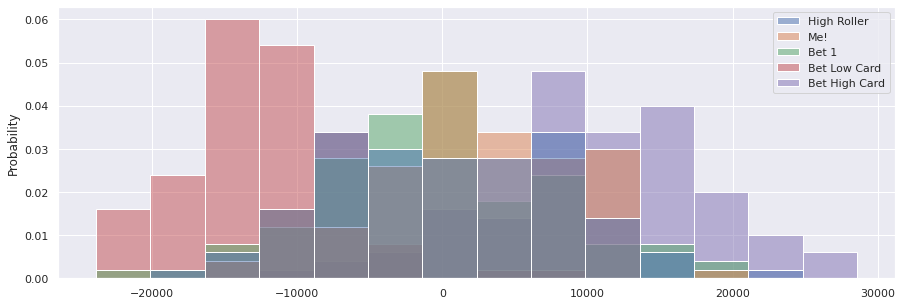

In [ ]:
from matplotlib import pylab
import seaborn
seaborn.set()
import pandas as pd
pylab.figure(figsize=(15,5))
df = pd.DataFrame(results)
del df['Cautious'] ## Dont plot Cautious (as it is constant)
seaborn.histplot(df,stat='probability')

Lets try a KDE (kernel density estimate) plot as our histograms are quite overlapping:

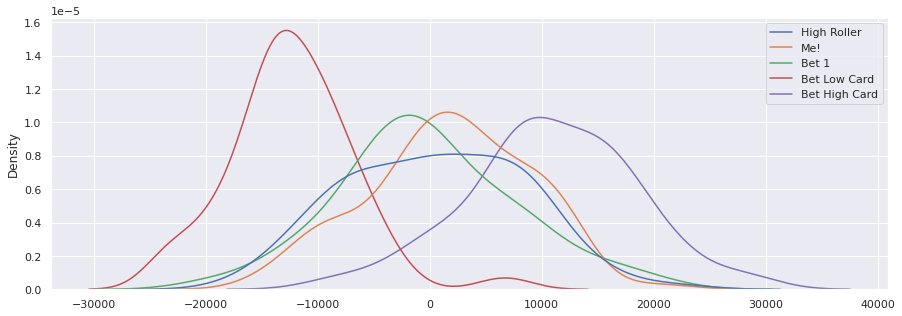

In [ ]:
from matplotlib import pylab
import seaborn
seaborn.set()
import pandas as pd
pylab.figure(figsize=(15,5))
df = pd.DataFrame(results)
del df['Cautious'] ## Dont plot Cautious (as it is constant)
seaborn.kdeplot(data=df)

We see that betting a high card is better, but not that much better, can you do better than it?

Or plot them separately:

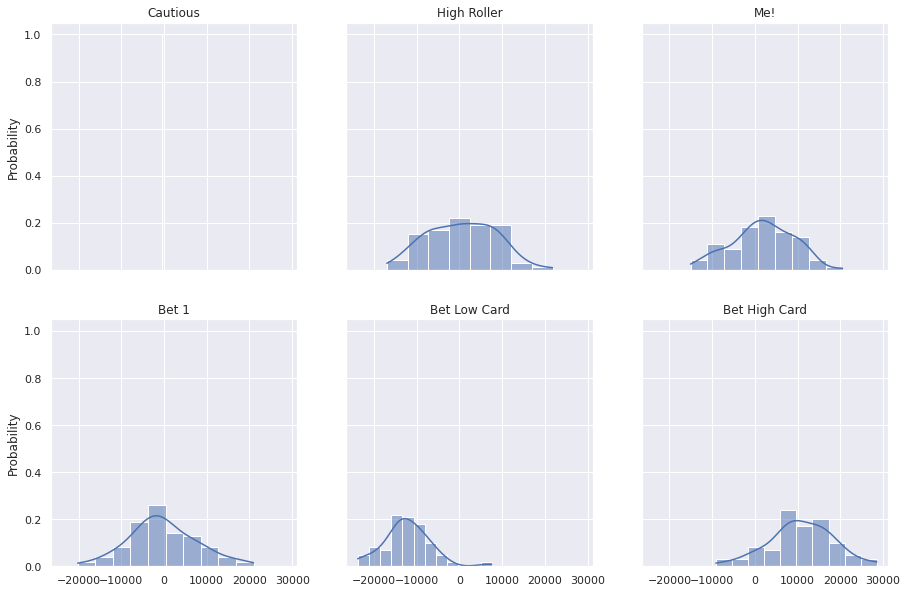

In [ ]:
from matplotlib import pylab
import seaborn
seaborn.set()

import random as rd
from math import ceil
fig,ax = pylab.subplots(2,ceil(len(results[0])/2),sharex=True,sharey=True,figsize=(15,10))
ax1 = [x for y in ax for x in y]
for idx,item in enumerate(results[0]):
    seaborn.histplot([x[item] for x in results],ax=ax1[idx],kde=True,stat='probability')
    ax1[idx].set_title(item)


## Reporting your results:

To report your results in the form, we should average over a large number of simulations this will take a little while use the following code:

In [ ]:
import sys
from tqdm import tqdm
results = []
for i in tqdm(range(500)):
  players = []
  players.append(cautiousAgent('Cautious'))
  players.append(highRoller('High Roller'))
  players.append(YOURAGENT('Me!'))
  players.append(alwaysBet1('Bet 1'))
  players.append(player_BetOnLowCard('Bet Low Card'))
  players.append(player_BetOnHighCard('Bet High Card'))
  currentGame = game.Game(players)
  currentGame.runGame(500)
  results.append(currentGame.getProfitByName())

100%|██████████| 500/500 [03:26<00:00,  2.43it/s]


Getting statistics:

In [ ]:
df = pd.DataFrame(results)
df.describe()

,Cautious,High Roller,Me!,Bet 1,Bet Low Card,Bet High Card
count,500.0,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-500.0,960.906800,1184.753133,773.487800,-11774.338533,9355.190800
std,0.0,7732.592488,7945.505034,7993.565557,6231.427101,6470.250143
min,-500.0,-20042.133333,-23544.100000,-25442.800000,-30794.800000,-10458.000000
25%,-500.0,-4511.500000,-3968.908333,-3896.875000,-16185.050000,5258.133333
50%,-500.0,855.016667,760.750000,549.666667,-12314.783333,9262.283333
75%,-500.0,5961.716667,5872.733333,5506.900000,-7813.950000,13547.550000
max,-500.0,26106.000000,25405.500000,29620.700000,8129.666667,27850.866667


Get the statistics for only your strategy for the forum:

In [ ]:
print(df['Me!'].describe())

count      500.000000
mean      1184.753133
std       7945.505034
min     -23544.100000
25%      -3968.908333
50%        760.750000
75%       5872.733333
max      25405.500000
Name: Me!, dtype: float64
